# About this notebook:

- We are labelling our articles with NLM-standardised Primary Disease MeSH terms.
- We will use the dictionaries from (00_Data_Collection) to match the Article_Given_MeSH terms, and give each article a set of labels from NLM-standardised Primary Disease MeSH terms.

[Part 1: Library Imports and Functions Creation](#ID_1)<br>
[Part 2: Import Dataset](#ID_2)<br>
[Part 3: MeSH Dictionary creation](#ID_3)<br>
[Part 4: Labelling articles with PubMed Pri Disease](#ID_4)<br>
[Part 5: EDA](#ID_5)<br>
[Part 6: Export](#ID_5)<br>

# 1. Library Imports & Functions Creation <a class="anchor" id="ID_1"></a>

In [109]:
import numpy as np 
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#Visualisation:
import seaborn               as sns
import matplotlib.pyplot     as plt
sns.set_theme(style="whitegrid")

#view progress tracking
from tqdm import tqdm
tqdm.pandas()

#text processing:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


#Showing missing, duplicates, shape, dtypes
def df_summary(df):
    print(f"Shape(col,rows): {df.shape}")
    print(f"Number of duplicates: {df.duplicated().sum()}")
    print('---'*20)
    print(f'Number of each unqiue datatypes:\n{df.dtypes.value_counts()}')
    print('---'*20)
    print("Columns with missing values:")
    isnull_df = pd.DataFrame(df.isnull().sum()).reset_index()
    isnull_df.columns = ['col','num_nulls']
    isnull_df['perc_null'] = ((isnull_df['num_nulls'])/(len(df))).round(2)
    print(isnull_df[isnull_df['num_nulls']>0])

# 2. Import Cleaned dataset <a class="anchor" id="ID_2"></a>

In [110]:
df = pd.read_csv("DATA_cleaned.csv")
df.reset_index(drop=True,inplace=True)
df
df_summary(df)

,ID,title,Pub_Date,abstract,Article_Given_MeSH
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"['biomarkers, tumor immunology', 'hla antigens..."
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"['aged', 'castleman disease complications', 'd..."
2,21205401,a discrete choice experiment investigating pre...,2011-01-06,polici debat fund criteria drug use treat rare...,"['biomedical research', 'choice behavior', 'co..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"['gastric balloon trends', 'humans', 'male', '..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"['animals', 'breeding', 'disease models, anima..."
...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"['dendritic cells immunology', 'host-pathogen ..."
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"['animals', 'antigens, viral immunology', 'cul..."
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"['atazanavir sulfate therapeutic use', 'cerebr..."
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"['aged', 'aged, 80 and over', 'b-lymphocytes p..."


Shape(col,rows): (323164, 5)
Number of duplicates: 0
------------------------------------------------------------
Number of each unqiue datatypes:
object    4
int64     1
dtype: int64
------------------------------------------------------------
Columns with missing values:
        col  num_nulls  perc_null
3  abstract         54        0.0


In [111]:
#Notice that the list of string in Article_Given_MeSH is now just strings due to the export and import of the dataframe
type(df['Article_Given_MeSH'][0])

str

In [112]:
df['Article_Given_MeSH'][0]

"['biomarkers, tumor immunology', 'hla antigens biosynthesis', 'hla-g antigens', 'histocompatibility antigens class i biosynthesis', 'humans', 'immunotherapy', 'lymphocytes, tumor-infiltrating pathology', 'neoplasms diagnosis', 'prognosis', 'tumor escape immunology']"

In [113]:
import ast
# Convert strings in column to lists
df['Article_Given_MeSH'] = df['Article_Given_MeSH'].apply(ast.literal_eval)
df['Article_Given_MeSH_str'] = df['Article_Given_MeSH'].str.join(', ')

In [114]:
df

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Article_Given_MeSH_str
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...","biomarkers, tumor immunology, hla antigens bio..."
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","aged, castleman disease complications, dendrit..."
2,21205401,a discrete choice experiment investigating pre...,2011-01-06,polici debat fund criteria drug use treat rare...,"[biomedical research, choice behavior, cost-be...","biomedical research, choice behavior, cost-ben..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","gastric balloon trends, humans, male, obesity,..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","animals, breeding, disease models, animal, dog..."
...,...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"[dendritic cells immunology, host-pathogen int...","dendritic cells immunology, host-pathogen inte..."
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"[animals, antigens, viral immunology, culicida...","animals, antigens, viral immunology, culicidae..."
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"[atazanavir sulfate therapeutic use, cerebrosp...","atazanavir sulfate therapeutic use, cerebrospi..."
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"[aged, aged, 80 and over, b-lymphocytes pathol...","aged, aged, 80 and over, b-lymphocytes patholo..."


In [115]:
df['Article_Given_MeSH_str'][0]

'biomarkers, tumor immunology, hla antigens biosynthesis, hla-g antigens, histocompatibility antigens class i biosynthesis, humans, immunotherapy, lymphocytes, tumor-infiltrating pathology, neoplasms diagnosis, prognosis, tumor escape immunology'

# 3. Creating MeSH Dictionaries <a class="anchor" id="ID_3"></a>

These dictionaries will be later used to match Article_Given_MeSH to PubMed_Primary_Disease_MeSH using disease-associated words.

## 3.1 Associated words from National Library of Medicine (NLM)

In [116]:
NLM_dict = np.load('01_Data Collection/NLM_MeSH_dictionary/NLM_MeSH.npy',allow_pickle='TRUE').item()
NLM_dict

{'22q11 deletion syndrome': {'cardiovascular diseases',
  'congenital, hereditary, and neonatal diseases and abnormalities',
  'endocrine system diseases',
  'hemic and lymphatic diseases',
  'musculoskeletal diseases'},
 '46, xx disorders of sex development': {'congenital, hereditary, and neonatal diseases and abnormalities',
  'endocrine system diseases',
  'urogenital diseases'},
 '46, xx testicular disorders of sex development': {'congenital, hereditary, and neonatal diseases and abnormalities',
  'endocrine system diseases',
  'urogenital diseases'},
 'abdomen, acute': {'pathological conditions, signs and symptoms'},
 'abdominal abscess': {'infections'},
 'abdominal injuries': {'wounds and injuries'},
 'abdominal neoplasms': {'neoplasms'},
 'abdominal pain': {'pathological conditions, signs and symptoms'},
 'abducens nerve diseases': {'nervous system diseases'},
 'abducens nerve injury': {'nervous system diseases', 'wounds and injuries'},
 'aberrant crypt foci': {'neoplasms'},
 'a

## 3.2 Associated words from MedlinePlus

In [117]:
asso_dict = np.load('01_Data Collection/MedlinePlus_dictionary/asso_dict.npy',allow_pickle='TRUE').item()
asso_dict

{'aaa': {'cardiovascular diseases'},
 'abdominal aortic aneurysm': {'cardiovascular diseases'},
 'abdominal pain': {'digestive system diseases'},
 'abdominal pregnancy': {'urogenital diseases'},
 'abo blood groups': {'cardiovascular diseases'},
 'abortion': {'urogenital diseases'},
 'accidents': {'skin and connective tissue diseases'},
 'achalasia': {'digestive system diseases', 'otorhinolaryngologic diseases'},
 'achilles tendon injuries': {'musculoskeletal diseases'},
 'achondroplasia': {'endocrine system diseases', 'musculoskeletal diseases'},
 'acid reflux': {'digestive system diseases'},
 'acl injuries': {'musculoskeletal diseases'},
 'acne': {'skin and connective tissue diseases'},
 'acne rosacea': {'skin and connective tissue diseases'},
 'acoustic neuroma': {'nervous system diseases',
  'otorhinolaryngologic diseases'},
 'acquired immunodeficiency syndrome': {'immune system diseases'},
 'acromegaly': {'endocrine system diseases', 'nervous system diseases'},
 'actinic keratosis'

In [118]:
asso_dict_2 = np.load('01_Data Collection/MedlinePlus_dictionary/asso_dict_2.npy',allow_pickle='TRUE').item()
asso_dict_2

{'a1c': {'endocrine system diseases'},
 'abdominal pregnancy': {'urogenital diseases'},
 'abnormalities': {'congenital, hereditary, and neonatal diseases and abnormalities'},
 'abortion': {'urogenital diseases'},
 'abpa': {'infections'},
 'abscess': {'infections'},
 'abuse': {'wounds and injuries'},
 'accidents': {'wounds and injuries'},
 'achilles tendon injuries': {'wounds and injuries'},
 'achondroplasia': {'congenital, hereditary, and neonatal diseases and abnormalities'},
 'acl injuries': {'wounds and injuries'},
 'acquired immunodeficiency syndrome': {'infections'},
 'actinic keratosis': {'neoplasms'},
 'acute bronchitis': {'infections'},
 'acute flaccid myelitis': {'infections'},
 'acute lymphoblastic leukemia': {'neoplasms'},
 'acute lymphocytic leukemia': {'neoplasms'},
 'acute myeloblastic leukemia': {'neoplasms'},
 'acute myeloid leukemia': {'neoplasms'},
 'adenoma': {'neoplasms'},
 'adenovirus infections': {'infections'},
 'adhesions': {'wounds and injuries'},
 'adolescent 

# 4. Labelling articles with PubMed Pri Disease names <a class="anchor" id="ID_4"></a>

These dictionaries will be later used to match Article_Given_MeSH to PubMed_Primary_Disease_MeSH using disease-associated words.

## 4.1 Transform Article_Given_MeSH_str to desired format: Article_Given_MeSH_set

Article_Given_MeSH_set is desired to contain a **set** of single-word terms (unigrams)

In [119]:
df.columns

Index(['ID', 'title', 'Pub_Date', 'abstract', 'Article_Given_MeSH',
       'Article_Given_MeSH_str'],
      dtype='object')

In [120]:
_df = df.copy()
_df['Article_Given_MeSH_str']
_df['Article_Given_MeSH_str'][1]

0         biomarkers, tumor immunology, hla antigens bio...
1         aged, castleman disease complications, dendrit...
2         biomedical research, choice behavior, cost-ben...
3         gastric balloon trends, humans, male, obesity,...
4         animals, breeding, disease models, animal, dog...
                                ...                        
323159    dendritic cells immunology, host-pathogen inte...
323160    animals, antigens, viral immunology, culicidae...
323161    atazanavir sulfate therapeutic use, cerebrospi...
323162    aged, aged, 80 and over, b-lymphocytes patholo...
323163    aneuploidy, aphasia, broca pathology, child, p...
Name: Article_Given_MeSH_str, Length: 323164, dtype: object

'aged, castleman disease complications, dendritic cell sarcoma, follicular complications, head and neck neoplasms complications, humans, male'

In [121]:
%%time
#remove stopwords
_df['Article_Given_MeSH_str'] = _df['Article_Given_MeSH_str'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# tokenise words
_df['Article_Given_MeSH_str'] = _df['Article_Given_MeSH_str'].apply(lambda x: word_tokenize(x))
#remove ',' in the list of string
_df['Article_Given_MeSH_str'] = _df['Article_Given_MeSH_str'].apply(lambda x: [string.replace(',', '') for string in x if string.strip()])
#remove blank strings ''
_df['Article_Given_MeSH_str'] = _df['Article_Given_MeSH_str'].apply(lambda x: [string for string in x if string])
#create a set of string
_df['Article_Given_MeSH_set'] = _df['Article_Given_MeSH_str'].apply(lambda x: (set(x)))


CPU times: total: 1min 8s
Wall time: 1min 16s


In [122]:
#convert Article_Given_MeSH_str back to string
_df['Article_Given_MeSH_str'] =  _df['Article_Given_MeSH_str'].str.join(', ')

## 4.2 Create a function to help in feature engineering

Matching terms in data-labels to the dictionary-terms

In [123]:
def find_matching_NLM_terms(terms):
    matching_ids = []
    for term in terms:
        if term in NLM_dict:
            matching_ids.extend(NLM_dict[term])
    return matching_ids

In [124]:
def find_matching_Associated_words(terms):
    matching_ids = []
    for term in terms:
        if term in asso_dict:
            matching_ids.extend(asso_dict[term])
    return matching_ids

In [125]:
def find_matching_Associated_words_2(terms):
    matching_ids = []
    for term in terms:
        if term in asso_dict_2:
            matching_ids.extend(asso_dict_2[term])
    return matching_ids

### Applying function to create new col of the y(labels)

In [126]:
#currently how the dataframe look like
_df

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Article_Given_MeSH_str,Article_Given_MeSH_set
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...","biomarkers, tumor, immunology, hla, antigens, ...","{lymphocytes, prognosis, hla, escape, immunoth..."
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","aged, castleman, disease, complications, dendr...","{aged, follicular, disease, sarcoma, complicat..."
2,21205401,a discrete choice experiment investigating pre...,2011-01-06,polici debat fund criteria drug use treat rare...,"[biomedical research, choice behavior, cost-be...","biomedical, research, choice, behavior, cost-b...","{therapy, students, &, young, health, economic..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","gastric, balloon, trends, humans, male, obesit...","{gastric, treatment, balloon, young, adult, hu..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","animals, breeding, disease, models, animal, do...","{skeletal, physiopathology, disease, animal, d..."
...,...,...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"[dendritic cells immunology, host-pathogen int...","dendritic, cells, immunology, host-pathogen, i...","{lectins, reactive, 2, toll-like, dendritic, s..."
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"[animals, antigens, viral immunology, culicida...","animals, antigens, viral, immunology, culicida...","{genetics, viral, &, chain, vectors, west, con..."
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"[atazanavir sulfate therapeutic use, cerebrosp...","atazanavir, sulfate, therapeutic, use, cerebro...","{controlled, sulfate, therapeutic, therapy, ge..."
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"[aged, aged, 80 and over, b-lymphocytes pathol...","aged, aged, 80, over, b-lymphocytes, pathology...","{shape, bone, lymphocytic, complications, midd..."


In [127]:
#Create NLM_labels column
_df['NLM_labels'] = _df['Article_Given_MeSH_set'].apply(find_matching_NLM_terms)
#Finding how many datarows did not get any Pri ID labels
mask = _df['NLM_labels'].apply(lambda x: x == [] or any(e == '' for e in x))
# apply filter to dataframe
filtered_df = df[mask]

print(f"Number of rows not matched(labelled) by this function): {len(filtered_df)}")

Number of rows not matched(labelled) by this function): 108079


In [128]:
#Create NLM_labels_2 column
_df['NLM_labels_2'] = _df['Article_Given_MeSH'].apply(find_matching_NLM_terms)
#Finding how many datarows did not get any Pri ID labels
mask = _df['NLM_labels_2'].apply(lambda x: x == [] or any(e == '' for e in x))
# apply filter to dataframe
filtered_df = df[mask]

print(f"Number of rows not matched(labelled) by this function): {len(filtered_df)}")

Number of rows not matched(labelled) by this function): 241810


In [129]:
#Create NLM_labels_3 column using Article_Given_MeSH
_df['NLM_labels_3'] = _df['Article_Given_MeSH_set'].apply(find_matching_Associated_words)
#Finding how many datarows did not get any Sec ID labels
mask3 = _df['NLM_labels_3'].apply(lambda x: x == [] or any(e == '' for e in x))
# apply filter to dataframe
filtered_df3 = df[mask3]

print(f"Number of rows not matched(labelled) by this function): {len(filtered_df3)}")

Number of rows not matched(labelled) by this function): 192742


In [130]:
#Create NLM_labels_4 column using Article_Given_MeSH
_df['NLM_labels_4'] = _df['Article_Given_MeSH'].apply(find_matching_Associated_words)
#Finding how many datarows did not get any Sec ID labels
mask3 = _df['NLM_labels_4'].apply(lambda x: x == [] or any(e == '' for e in x))
# apply filter to dataframe
filtered_df3 = df[mask3]

print(f"Number of rows not matched(labelled) by this function): {len(filtered_df3)}")

Number of rows not matched(labelled) by this function): 300789


In [131]:
#Create NLM_labels_5 column using Article_Given_MeSH
_df['NLM_labels_5'] = _df['Article_Given_MeSH_set'].apply(find_matching_Associated_words_2)
#Finding how many datarows did not get any Sec ID labels
mask3 = _df['NLM_labels_5'].apply(lambda x: x == [] or any(e == '' for e in x))
# apply filter to dataframe
filtered_df3 = df[mask3]

print(f"Number of rows not matched(labelled) by this function): {len(filtered_df3)}")

Number of rows not matched(labelled) by this function): 199348


In [132]:
#Create NLM_labels_6 column using Article_Given_MeSH
_df['NLM_labels_6'] = _df['Article_Given_MeSH'].apply(find_matching_Associated_words)
#Finding how many datarows did not get any Sec ID labels
mask3 = _df['NLM_labels_6'].apply(lambda x: x == [] or any(e == '' for e in x))
# apply filter to dataframe
filtered_df3 = df[mask3]

print(f"Number of rows not matched(labelled) by this function): {len(filtered_df3)}")

Number of rows not matched(labelled) by this function): 300789


### Convert [] to NaN

Some articles did not receive IDs (as the MeSH words cannot match any terms in the given dictionary)
Thus, it will return as empty list, which we will convert to just NaN

In [133]:
col_ls = [
    'NLM_labels',
    'NLM_labels_2',
    'NLM_labels_3',
    'NLM_labels_4',
    'NLM_labels_5',
    'NLM_labels_6'
]

In [134]:
for col in col_ls:
    cond = _df[col].apply(lambda x: isinstance(x, list) and len(x)==0)
    _df.loc[cond,col]= np.nan

In [135]:
_df.head()

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Article_Given_MeSH_str,Article_Given_MeSH_set,NLM_labels,NLM_labels_2,NLM_labels_3,NLM_labels_4,NLM_labels_5,NLM_labels_6
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...","biomarkers, tumor, immunology, hla, antigens, ...","{lymphocytes, prognosis, hla, escape, immunoth...",[neoplasms],NaN,NaN,NaN,"[neoplasms, neoplasms]",NaN
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","aged, castleman, disease, complications, dendr...","{aged, follicular, disease, sarcoma, complicat...","[pathological conditions, signs and symptoms, ...",NaN,NaN,NaN,[neoplasms],NaN
2,21205401,a discrete choice experiment investigating pre...,2011-01-06,polici debat fund criteria drug use treat rare...,"[biomedical research, choice behavior, cost-be...","biomedical, research, choice, behavior, cost-b...","{therapy, students, &, young, health, economic...",NaN,NaN,NaN,NaN,NaN,NaN
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","gastric, balloon, trends, humans, male, obesit...","{gastric, treatment, balloon, young, adult, hu...","[nutritional and metabolic diseases, pathologi...",NaN,NaN,NaN,[nutritional and metabolic diseases],NaN
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","animals, breeding, disease, models, animal, do...","{skeletal, physiopathology, disease, animal, d...","[pathological conditions, signs and symptoms]",[animal diseases],NaN,NaN,NaN,NaN


In [136]:
#Showing number of Na in each column
_df.isnull().sum()

ID                             0
title                          0
Pub_Date                       0
abstract                      54
Article_Given_MeSH             0
Article_Given_MeSH_str         0
Article_Given_MeSH_set         0
NLM_labels                108079
NLM_labels_2              241810
NLM_labels_3              192742
NLM_labels_4              300789
NLM_labels_5              199348
NLM_labels_6              300789
dtype: int64

In [137]:
cond_A = _df['NLM_labels'].isnull()
cond_B = _df['NLM_labels_2'].isnull()
cond_C = _df['NLM_labels_3'].isnull()
cond_D = _df['NLM_labels_4'].isnull()
cond_E = _df['NLM_labels_5'].isnull()
cond_F = _df['NLM_labels_6'].isnull()

_df.loc[cond_A&cond_B&cond_C&cond_D&cond_E&cond_F,:]

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Article_Given_MeSH_str,Article_Given_MeSH_set,NLM_labels,NLM_labels_2,NLM_labels_3,NLM_labels_4,NLM_labels_5,NLM_labels_6
2,21205401,a discrete choice experiment investigating pre...,2011-01-06,polici debat fund criteria drug use treat rare...,"[biomedical research, choice behavior, cost-be...","biomedical, research, choice, behavior, cost-b...","{therapy, students, &, young, health, economic...",NaN,NaN,NaN,NaN,NaN,NaN
7,21244701,long-term cd4+ lymphocyte response following h...,2011-01-20,among hivinfect person initi highli activ anti...,[],,{},NaN,NaN,NaN,NaN,NaN,NaN
10,29920021,magnesium in parkinson’s disease: an update in...,2011-01-01,magnesium mg essenti cell function transport...,[],,{},NaN,NaN,NaN,NaN,NaN,NaN
11,21233056,effect of previous-winter mortality on the ass...,2011-01-15,recent postul low mortal level previou winter ...,"[aged, aged, 80 and over, cold temperature adv...","aged, aged, 80, over, cold, temperature, adver...","{epidemiology, adverse, temperature, hot, 80, ...",NaN,NaN,NaN,NaN,NaN,NaN
17,21257731,endocytic response of type i alveolar epitheli...,2011-01-25,present plasma membran pm intern respons typ...,"[alveolar epithelial cells drug effects, anima...","alveolar, epithelial, cells, drug, effects, an...","{punctures, membrane, kinases, stress, clathri...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323146,26634493,a novel frameshift deletion in the col1a1 gene...,2015-12-05,osteogenesi imperfecta oi genet heterogen gr...,"[asian people genetics, collagen type i geneti...","asian, people, genetics, collagen, type, genet...","{genetics, type, chain, i, middle, dentinogene...",NaN,NaN,NaN,NaN,NaN,NaN
323148,26664042,does autoimmunity against thyroglobulin play a...,2015-12-15,author believ autoimmun tsh receptor express o...,[],,{},NaN,NaN,NaN,NaN,NaN,NaN
323151,26653245,[determination of total bromine in urine by in...,2015-12-15,establish method determin total bromin urinedi...,"[bromine urine, humans, mass spectrometry]","bromine, urine, humans, mass, spectrometry","{spectrometry, humans, urine, mass, bromine}",NaN,NaN,NaN,NaN,NaN,NaN
323154,26697025,identification of new resistance loci to afric...,2015-12-24,stem rust caus puccinia gramini per f sp tr...,[],,{},NaN,NaN,NaN,NaN,NaN,NaN


**Comments**

There is 82309 articles whose **given** MeSH words does not match the terms in our MeSH dictionaries, OR they did not have data for its Article_Given_MeSH

Plan: 
1. Remove data rows that contain NaN
1. Explore NLM labels used to label the articles

# 5. EDA <a class="anchor" id="ID_5"></a>

## 5.1 Some processing

### Drop NaN

In [138]:
_df2 = _df.copy()

In [139]:
_df2.shape

(323164, 13)

In [140]:
cond_A = _df['NLM_labels'].notnull()
cond_B = _df['NLM_labels_2'].notnull()
cond_C = _df['NLM_labels_3'].notnull()
cond_D = _df['NLM_labels_4'].notnull()
cond_E = _df['NLM_labels_5'].notnull()
cond_F = _df['NLM_labels_6'].notnull()
cond_G = _df['abstract'].notnull()

In [141]:
_df2 = _df2.loc[(cond_A|cond_B|cond_C|cond_D|cond_E|cond_F) & cond_G,:]

In [142]:
len(_df2)

240836

### Convert list of ID to Set

In [143]:
_df2 = _df2.fillna('')

In [144]:
for col in col_ls:
    _df2[col] = _df2.loc[:, col].apply(lambda x: (set(x)))

In [145]:
_df2

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Article_Given_MeSH_str,Article_Given_MeSH_set,NLM_labels,NLM_labels_2,NLM_labels_3,NLM_labels_4,NLM_labels_5,NLM_labels_6
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...","biomarkers, tumor, immunology, hla, antigens, ...","{lymphocytes, prognosis, hla, escape, immunoth...",{neoplasms},{},{},{},{neoplasms},{}
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","aged, castleman, disease, complications, dendr...","{aged, follicular, disease, sarcoma, complicat...","{neoplasms, pathological conditions, signs and...",{},{},{},{neoplasms},{}
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","gastric, balloon, trends, humans, male, obesit...","{gastric, treatment, balloon, young, adult, hu...","{nutritional and metabolic diseases, pathologi...",{},{},{},{nutritional and metabolic diseases},{}
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","animals, breeding, disease, models, animal, do...","{skeletal, physiopathology, disease, animal, d...","{pathological conditions, signs and symptoms}",{animal diseases},{},{},{},{}
5,21220749,dichotomous regulation of gvhd through bidirec...,2011-01-12,b lymphocyt attenu btla coinhibitori recepto...,"[animals, antibodies, monoclonal pharmacology,...","animals, antibodies, monoclonal, pharmacology,...","{necrosis, receptors, protein, tumor, binding,...","{pathological conditions, signs and symptoms}",{},{},{},{neoplasms},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"[dendritic cells immunology, host-pathogen int...","dendritic, cells, immunology, host-pathogen, i...","{lectins, reactive, 2, toll-like, dendritic, s...",{infections},{},{respiratory tract diseases},{},{infections},{}
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"[animals, antigens, viral immunology, culicida...","animals, antigens, viral, immunology, culicida...","{genetics, viral, &, chain, vectors, west, con...","{pathological conditions, signs and symptoms}",{},{},{},{infections},{}
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"[atazanavir sulfate therapeutic use, cerebrosp...","atazanavir, sulfate, therapeutic, use, cerebro...","{controlled, sulfate, therapeutic, therapy, ge...",{infections},{},{immune system diseases},{},{infections},{}
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"[aged, aged, 80 and over, b-lymphocytes pathol...","aged, aged, 80, over, b-lymphocytes, pathology...","{shape, bone, lymphocytic, complications, midd...",{neoplasms},{},{cardiovascular diseases},{},{neoplasms},{}


In [146]:
# combine them primary disease names columns
combine_sets = lambda row: row['NLM_labels'] | row['NLM_labels_2'] | row['NLM_labels_3']|row['NLM_labels_4']|row['NLM_labels_5']|row['NLM_labels_6']
_df2['Pri_diseases_name'] = _df2.apply(combine_sets, axis=1)
_df2

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Article_Given_MeSH_str,Article_Given_MeSH_set,NLM_labels,NLM_labels_2,NLM_labels_3,NLM_labels_4,NLM_labels_5,NLM_labels_6,Pri_diseases_name
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...","biomarkers, tumor, immunology, hla, antigens, ...","{lymphocytes, prognosis, hla, escape, immunoth...",{neoplasms},{},{},{},{neoplasms},{},{neoplasms}
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","aged, castleman, disease, complications, dendr...","{aged, follicular, disease, sarcoma, complicat...","{neoplasms, pathological conditions, signs and...",{},{},{},{neoplasms},{},"{neoplasms, pathological conditions, signs and..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","gastric, balloon, trends, humans, male, obesit...","{gastric, treatment, balloon, young, adult, hu...","{nutritional and metabolic diseases, pathologi...",{},{},{},{nutritional and metabolic diseases},{},"{nutritional and metabolic diseases, pathologi..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","animals, breeding, disease, models, animal, do...","{skeletal, physiopathology, disease, animal, d...","{pathological conditions, signs and symptoms}",{animal diseases},{},{},{},{},"{animal diseases, pathological conditions, sig..."
5,21220749,dichotomous regulation of gvhd through bidirec...,2011-01-12,b lymphocyt attenu btla coinhibitori recepto...,"[animals, antibodies, monoclonal pharmacology,...","animals, antibodies, monoclonal, pharmacology,...","{necrosis, receptors, protein, tumor, binding,...","{pathological conditions, signs and symptoms}",{},{},{},{neoplasms},{},"{neoplasms, pathological conditions, signs and..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"[dendritic cells immunology, host-pathogen int...","dendritic, cells, immunology, host-pathogen, i...","{lectins, reactive, 2, toll-like, dendritic, s...",{infections},{},{respiratory tract diseases},{},{infections},{},"{respiratory tract diseases, infections}"
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"[animals, antigens, viral immunology, culicida...","animals, antigens, viral, immunology, culicida...","{genetics, viral, &, chain, vectors, west, con...","{pathological conditions, signs and symptoms}",{},{},{},{infections},{},"{infections, pathological conditions, signs an..."
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"[atazanavir sulfate therapeutic use, cerebrosp...","atazanavir, sulfate, therapeutic, use, cerebro...","{controlled, sulfate, therapeutic, therapy, ge...",{infections},{},{immune system diseases},{},{infections},{},"{immune system diseases, infections}"
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"[aged, aged, 80 and over, b-lymphocytes pathol...","aged, aged, 80, over, b-lymphocytes, pathology...","{shape, bone, lymphocytic, complications, midd...",{neoplasms},{},{cardiovascular diseases},{},{neoplasms},{},"{neoplasms, cardiovascular diseases}"


In [147]:
_df2.columns

Index(['ID', 'title', 'Pub_Date', 'abstract', 'Article_Given_MeSH',
       'Article_Given_MeSH_str', 'Article_Given_MeSH_set', 'NLM_labels',
       'NLM_labels_2', 'NLM_labels_3', 'NLM_labels_4', 'NLM_labels_5',
       'NLM_labels_6', 'Pri_diseases_name'],
      dtype='object')

In [148]:
_df3 = _df2.drop(columns = [
    'Article_Given_MeSH_str',
    'Article_Given_MeSH_set',
    'NLM_labels',
    'NLM_labels_2',
    'NLM_labels_3',
    'NLM_labels_4',
    'NLM_labels_5',
    'NLM_labels_6'
])

_df3

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Pri_diseases_name
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...",{neoplasms}
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","{neoplasms, pathological conditions, signs and..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","{nutritional and metabolic diseases, pathologi..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","{animal diseases, pathological conditions, sig..."
5,21220749,dichotomous regulation of gvhd through bidirec...,2011-01-12,b lymphocyt attenu btla coinhibitori recepto...,"[animals, antibodies, monoclonal pharmacology,...","{neoplasms, pathological conditions, signs and..."
...,...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"[dendritic cells immunology, host-pathogen int...","{respiratory tract diseases, infections}"
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"[animals, antigens, viral immunology, culicida...","{infections, pathological conditions, signs an..."
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"[atazanavir sulfate therapeutic use, cerebrosp...","{immune system diseases, infections}"
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"[aged, aged, 80 and over, b-lymphocytes pathol...","{neoplasms, cardiovascular diseases}"


## 5.2 Analyse the dictionaries

In [149]:
df_NLM = pd.DataFrame(list(NLM_dict.items()), columns=['key', 'value'])
df_NLM = df_NLM.explode('value')

In [150]:
df_medlineplus_1 = pd.DataFrame(list(asso_dict.items()), columns=['key', 'value'])
df_medlineplus_1 = df_medlineplus_1.explode('value')

In [151]:
df_medlineplus_2 = pd.DataFrame(list(asso_dict_2.items()), columns=['key', 'value'])
df_medlineplus_2 = df_medlineplus_2.explode('value')

In [152]:
df_all_NLM_associated_words = pd.concat([df_NLM,df_medlineplus_1,df_medlineplus_2])
df_all_NLM_associated_words

,key,value
0,22q11 deletion syndrome,musculoskeletal diseases
0,22q11 deletion syndrome,hemic and lymphatic diseases
0,22q11 deletion syndrome,endocrine system diseases
0,22q11 deletion syndrome,"congenital, hereditary, and neonatal diseases ..."
0,22q11 deletion syndrome,cardiovascular diseases
...,...,...
927,yeast infections,infections
928,yellow fever,infections
929,yersinia enterocolitica,chemically-induced disorders
930,zika virus,infections


In [153]:
df_all_NLM_associated_words.groupby('value').size().sort_values()

value
disorders of environmental origin                                     5
occupational diseases                                                24
animal diseases                                                     136
stomatognathic diseases                                             220
chemically-induced disorders                                        237
otorhinolaryngologic diseases                                       274
hemic and lymphatic diseases                                        282
endocrine system diseases                                           317
eye diseases                                                        324
respiratory tract diseases                                          351
wounds and injuries                                                 390
immune system diseases                                              394
nutritional and metabolic diseases                                  413
digestive system diseases                                 

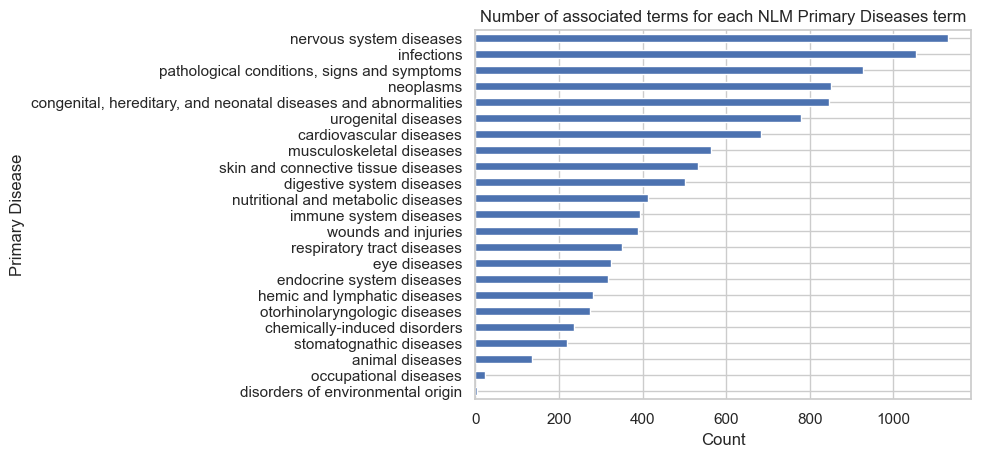

In [154]:
_s = df_all_NLM_associated_words.groupby('value').size().sort_values()
_s.plot.barh()

# add labels and title
plt.ylabel('Primary Disease')
plt.xlabel('Count')
plt.title('Number of associated terms for each NLM Primary Diseases term')

# show the chart
plt.show();

**Comments**
- Some NLM Primary Diseases terms have much lesser matching terms for the dictionary to recognise when labelling the articles.
- As such, the articles are less possibly labelled with these NLM Primary Diseases terms (e.g. 'occupational diseases' with <200 associated words in the dictionary)

## 5.3 Analyse the NLM Primary Diseases terms used in labelling the articles:

In [155]:
_df3.columns

Index(['ID', 'title', 'Pub_Date', 'abstract', 'Article_Given_MeSH',
       'Pri_diseases_name'],
      dtype='object')

In [156]:
unique_Pri_terms = set()
for row in _df3['Pri_diseases_name']:
    unique_Pri_terms.update(row)
print(f"Number of unique NLM Primary Diseases terms used: {len(unique_Pri_terms)} out of 23 found in the dictionary")

Number of unique NLM Primary Diseases terms used: 23 out of 23 found in the dictionary


**Comments**

All 23 NLM Primary Diseases terms are used to label the articles


## 5.4 Analyse Articles and their labels:

In [157]:
_df4=_df3.copy()

In [158]:
_df4.columns

Index(['ID', 'title', 'Pub_Date', 'abstract', 'Article_Given_MeSH',
       'Pri_diseases_name'],
      dtype='object')

### 5.4.1 NLM Primary Diseases terms(labels) each Article has:

In [159]:
df_exploded = _df4.explode('Pri_diseases_name')
PRIid_dist_count = df_exploded['Pri_diseases_name'].value_counts().sort_values()
PRIid_dist_count

disorders of environmental origin                                       3
occupational diseases                                                 178
stomatognathic diseases                                              1969
eye diseases                                                         4085
otorhinolaryngologic diseases                                        5530
congenital, hereditary, and neonatal diseases and abnormalities      7602
hemic and lymphatic diseases                                         7662
chemically-induced disorders                                         9040
wounds and injuries                                                 12060
skin and connective tissue diseases                                 15611
digestive system diseases                                           16543
endocrine system diseases                                           16899
respiratory tract diseases                                          17326
musculoskeletal diseases              

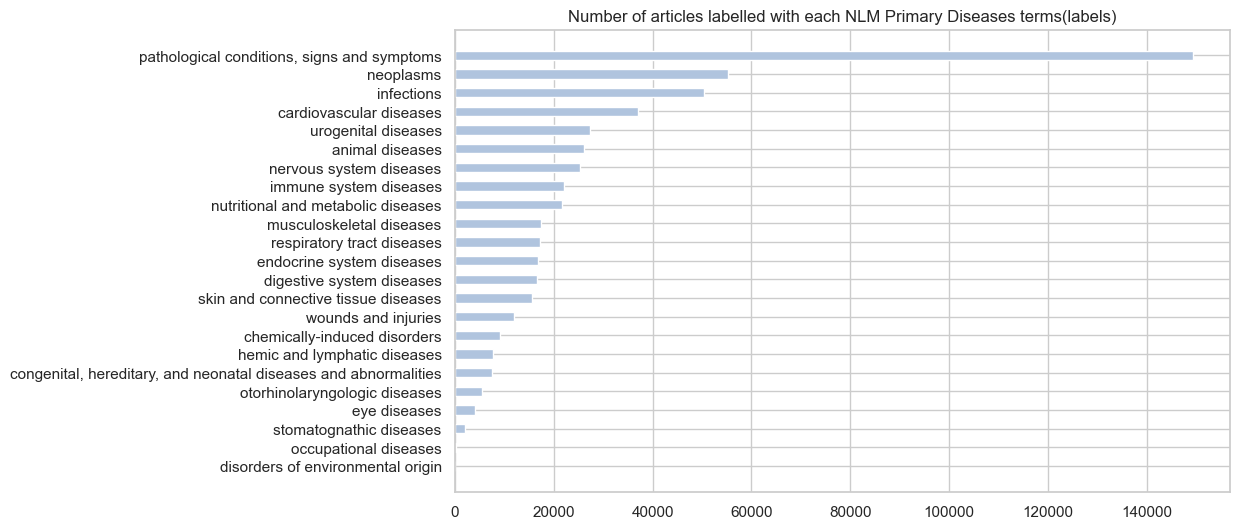

In [160]:
fig = plt.figure(figsize=(10,6))

plt.barh(y = PRIid_dist_count.index,
         width = PRIid_dist_count,
         color = 'lightsteelblue',
         height = 0.5);

plt.title("Number of articles labelled with each NLM Primary Diseases terms(labels)",fontsize=12);

**Comments**

*Recall from earlier**
- Some NLM Primary Diseases terms have much lesser matching terms for the dictionary to recognise when labelling the articles.
- As such, the articles are less possibly labelled with these NLM Primary Diseases terms (e.g. 'occupational diseases' with <200 associated words in the dictionary)

*Examining number of articles lablled with each NLM Primary Disease terms:*
- NLM Pri Diseases terms with MORE associated terms (e.g. neoplasm, cardiovascular diseases and infection) naturally has more articles recognised by the dictionary and labelled as such
- NLM Pri Diseases terms with LESS associated terms (e.g. occupational diseases and disorders of environmental origin) naturally has less articles recognised by the dictionary and labelled as such
- However, surprisingly, 'Nervous system diseases' which has the most number of associated terms (>1100) has one of the least number of articles labelled it (<30K).
- 'Animal Diseases' which has lesser number of associated terms (<200), has moderate number of articles labelled it (>20K).

### 5.4.2 Number of labels each article has

In [161]:
_df4.head()

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Pri_diseases_name
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...",{neoplasms}
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","{neoplasms, pathological conditions, signs and..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","{nutritional and metabolic diseases, pathologi..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","{animal diseases, pathological conditions, sig..."
5,21220749,dichotomous regulation of gvhd through bidirec...,2011-01-12,b lymphocyt attenu btla coinhibitori recepto...,"[animals, antibodies, monoclonal pharmacology,...","{neoplasms, pathological conditions, signs and..."


In [162]:
_df4["No_of_labels"] = _df4["Pri_diseases_name"].apply(lambda x: len(x))
_df4.head()

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Pri_diseases_name,No_of_labels
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...",{neoplasms},1
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","{neoplasms, pathological conditions, signs and...",2
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","{nutritional and metabolic diseases, pathologi...",2
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","{animal diseases, pathological conditions, sig...",2
5,21220749,dichotomous regulation of gvhd through bidirec...,2011-01-12,b lymphocyt attenu btla coinhibitori recepto...,"[animals, antibodies, monoclonal pharmacology,...","{neoplasms, pathological conditions, signs and...",2


In [163]:
_df4.groupby("No_of_labels").size()

No_of_labels
1     76900
2     77812
3     49077
4     24327
5      8772
6      2718
7       853
8       268
9        81
10       19
11        6
12        2
13        1
dtype: int64

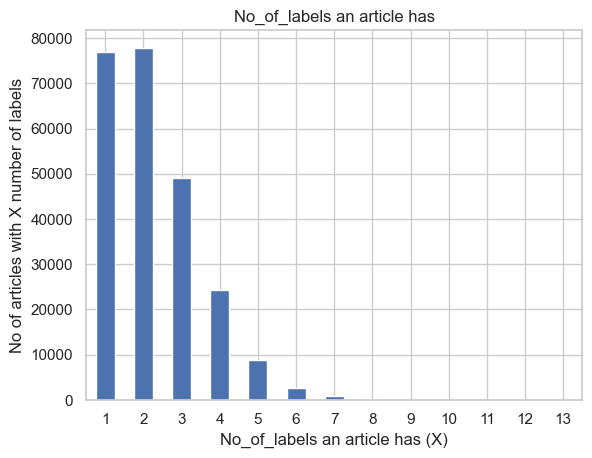

In [165]:
_s = _df4.groupby("No_of_labels").size()
_s.plot.bar()

# add labels and title
plt.xlabel('No_of_labels an article has (X)')
plt.ylabel('No of articles with X number of labels')
plt.title('No_of_labels an article has')
plt.xticks(rotation=0)
# show the chart
plt.show();

**Comments:**<br>
Most of the articles have between 1 to 3 labels. With one article having as many as 13 labels


# <a class="anchor" id="ID_6">6. Export </a>
> we now have a dataframe ready to be used for modelling

In [90]:
col_ls = ['ID', 'title', 'Pub_Date', 'abstract', 'Article_Given_MeSH','Pri_diseases_name']
_df5 = _df4.loc[:,col_ls]
_df5

,ID,title,Pub_Date,abstract,Article_Given_MeSH,Pri_diseases_name
0,21210353,human leukocyte antigen-g (hla-g) as a marker ...,2011-01-07,human leukocyt antigeng hlag nonclass hlacla...,"[biomarkers, tumor immunology, hla antigens bi...",{neoplasms}
1,21265258,head and neck follicular dendritic cell sarcom...,2011-01-27,current less 50 case head neck follicular den...,"[aged, castleman disease complications, dendri...","{neoplasms, pathological conditions, signs and..."
3,21245633,effectiveness of repeated intragastric balloon...,2011-01-20,19yearold japanes male bmi 554 kgm 2 also li...,"[gastric balloon trends, humans, male, obesity...","{nutritional and metabolic diseases, pathologi..."
4,21194024,golden retriever muscular dystrophy (grmd): de...,2011-01-05,studi canin model duchenn muscular dystrophi ...,"[animals, breeding, disease models, animal, do...","{animal diseases, pathological conditions, sig..."
5,21220749,dichotomous regulation of gvhd through bidirec...,2011-01-12,b lymphocyt attenu btla coinhibitori recepto...,"[animals, antibodies, monoclonal pharmacology,...","{neoplasms, pathological conditions, signs and..."
...,...,...,...,...,...,...
323159,26709456,reactive oxygen species production by human de...,2015-12-29,tuberculosi remain singl largest infecti disea...,"[dendritic cells immunology, host-pathogen int...","{respiratory tract diseases, infections}"
323160,26675461,evaluating the use of commercial west nile vir...,2015-12-18,evalu util 2 type commerci avail antigen posit...,"[animals, antigens, viral immunology, culicida...","{infections, pathological conditions, signs an..."
323161,26709605,efficacy of protease inhibitor monotherapy vs....,2015-12-29,aim analysi review evid updat metaanalysi eval...,"[atazanavir sulfate therapeutic use, cerebrosp...","{immune system diseases, infections}"
323162,26662151,the occurrence of chronic lymphocytic leukemia...,2015-12-15,occurr chronic myeloid leukemia cml chronic ...,"[aged, aged, 80 and over, b-lymphocytes pathol...","{neoplasms, cardiovascular diseases}"


In [91]:
_df5.to_csv("Modelling_df.csv",index=False)